In [2]:
import uncertainties.unumpy as unp
import uncertainties as u

from uncertainties import ufloat
import numpy as np
import pandas as pd
import scipy as sp
import kafe2
import matplotlib.pyplot as plt

import sympy

from pathlib import Path

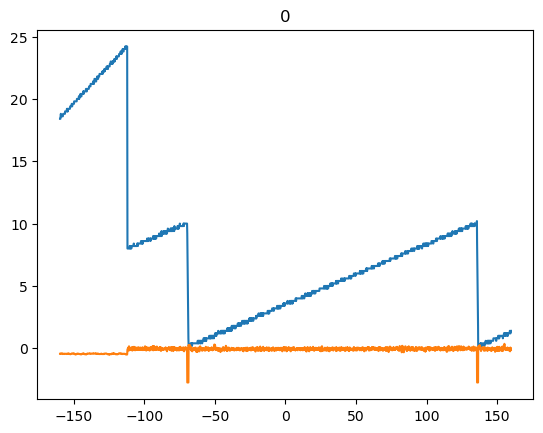

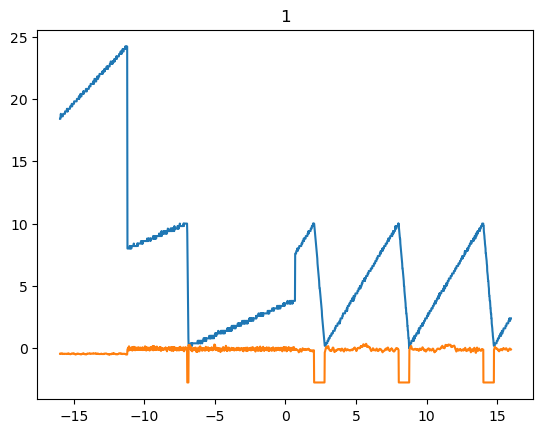

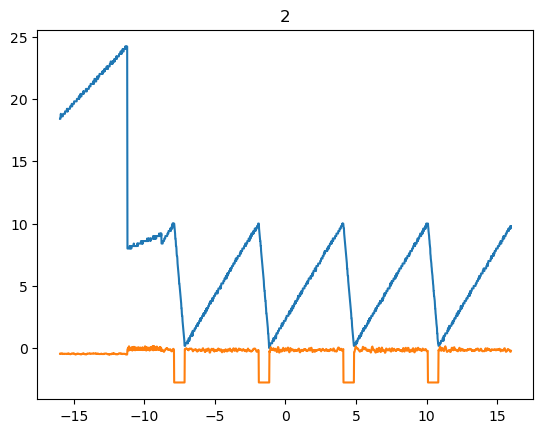

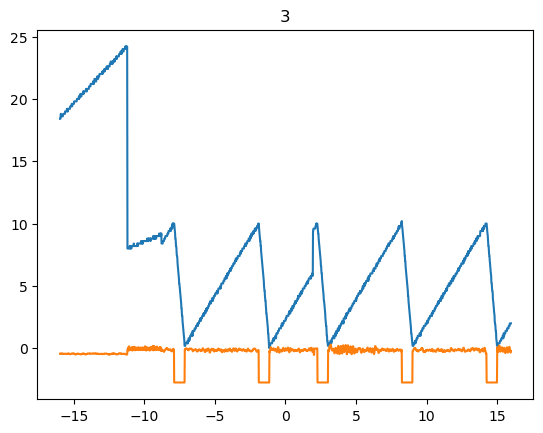

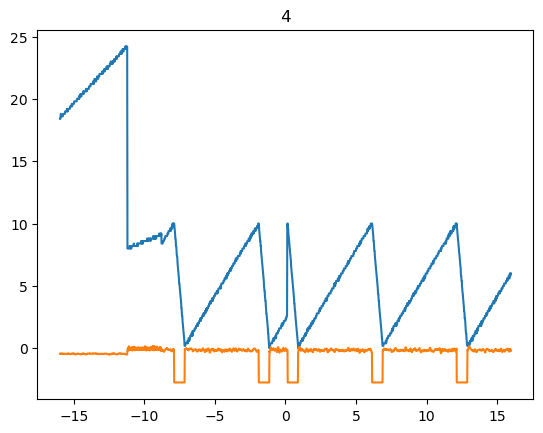

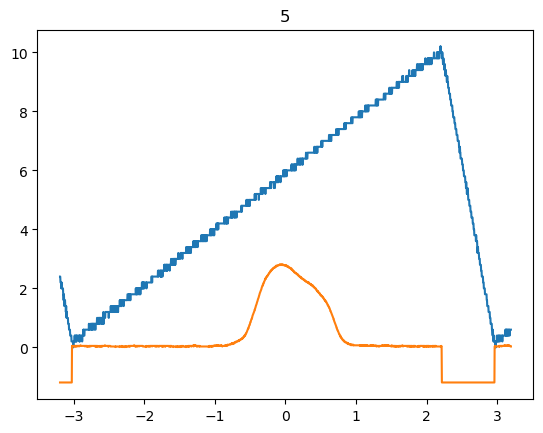

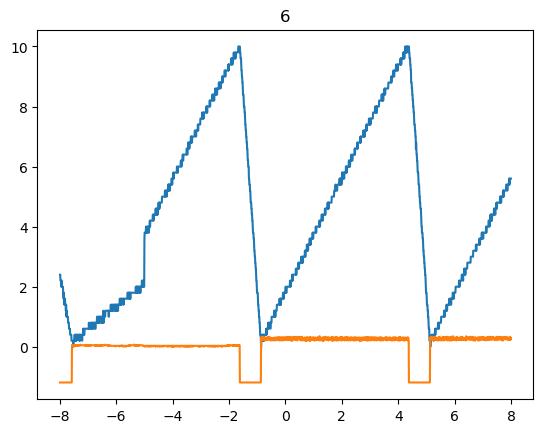

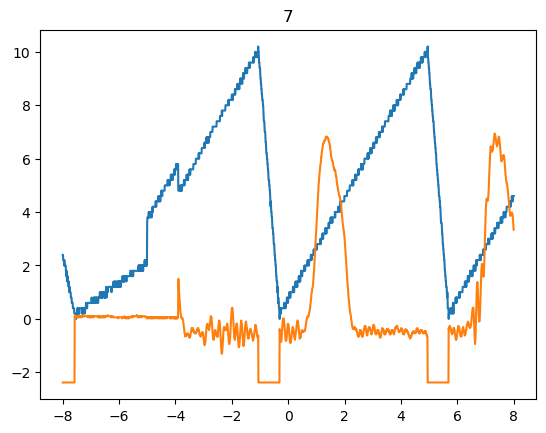

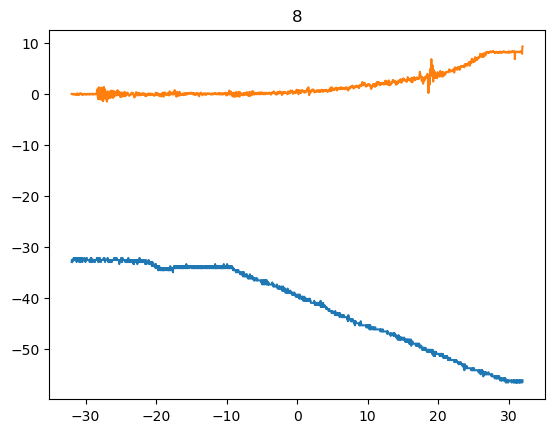

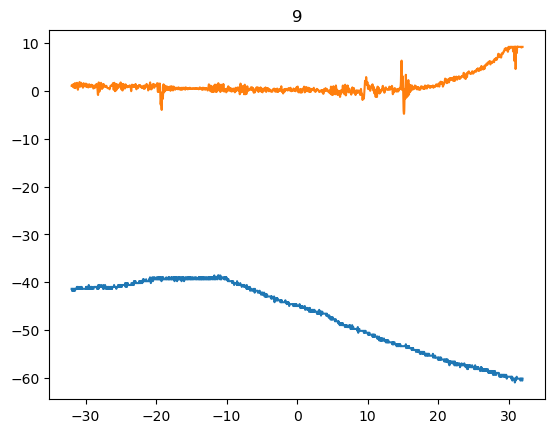

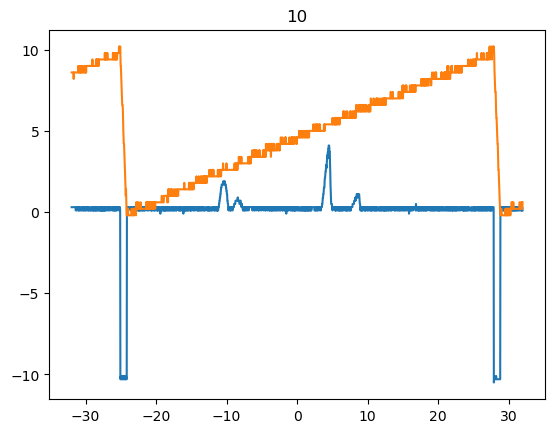

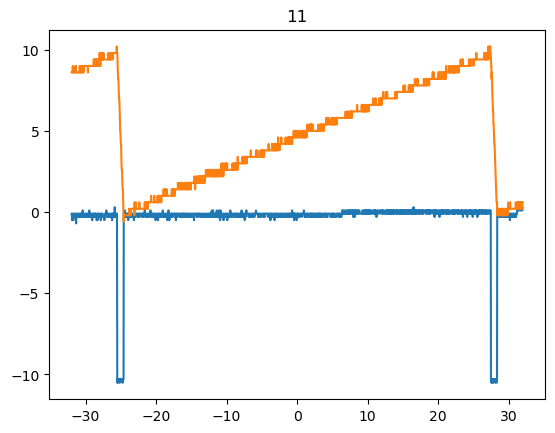

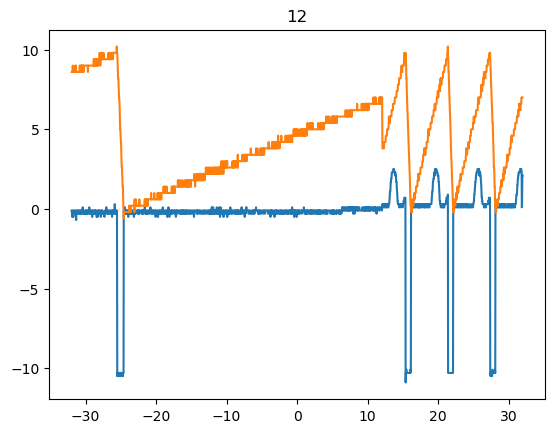

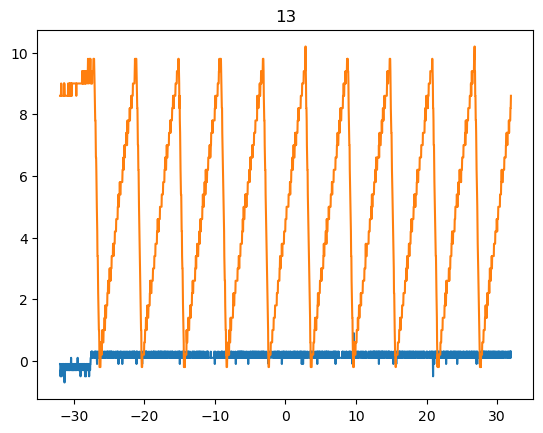

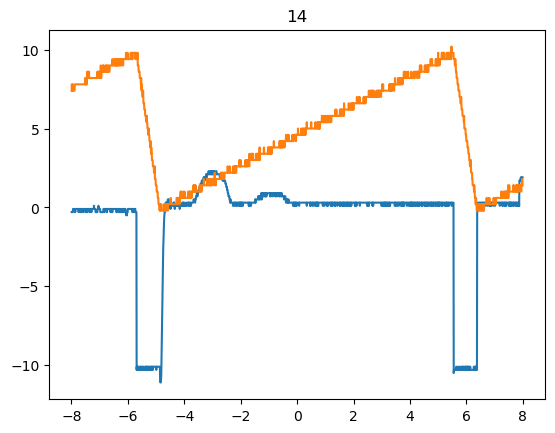

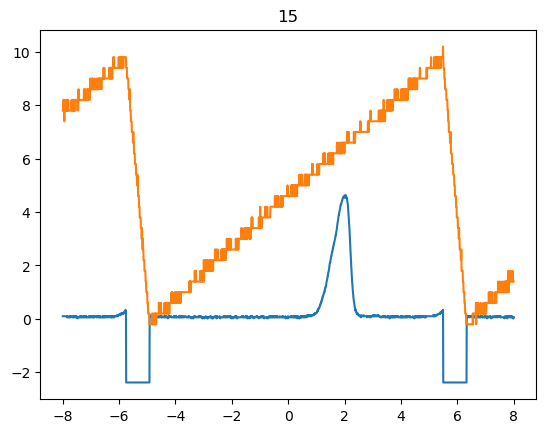

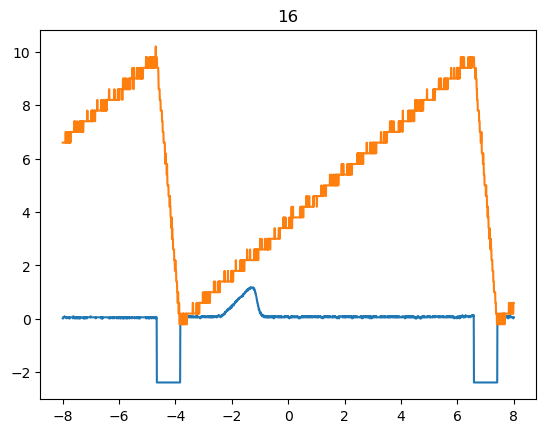

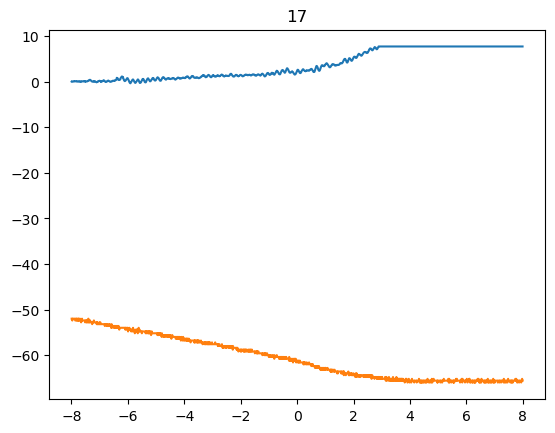

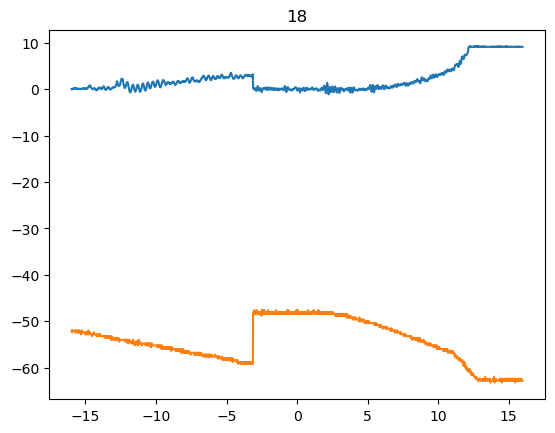

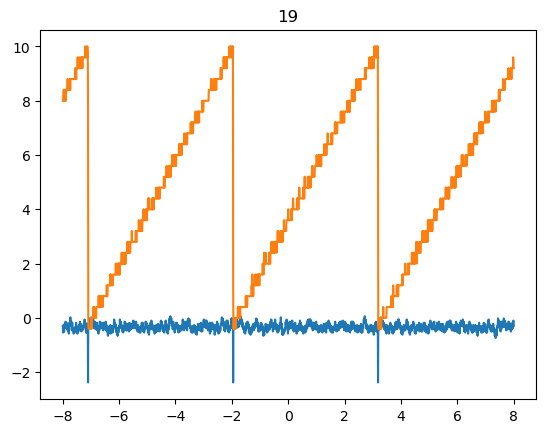

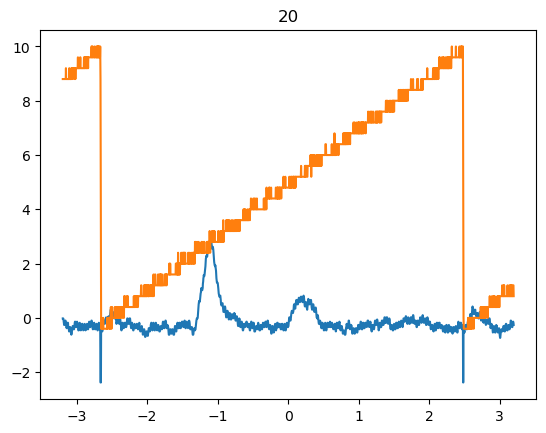

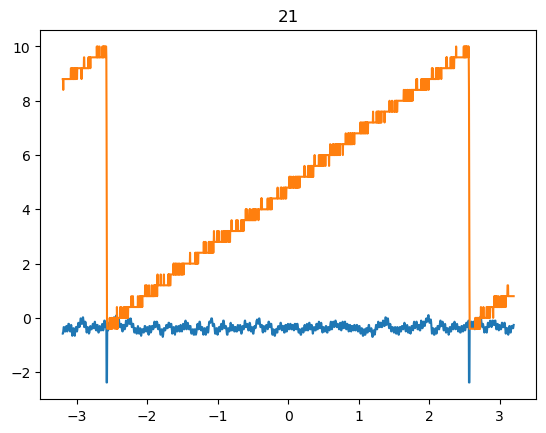

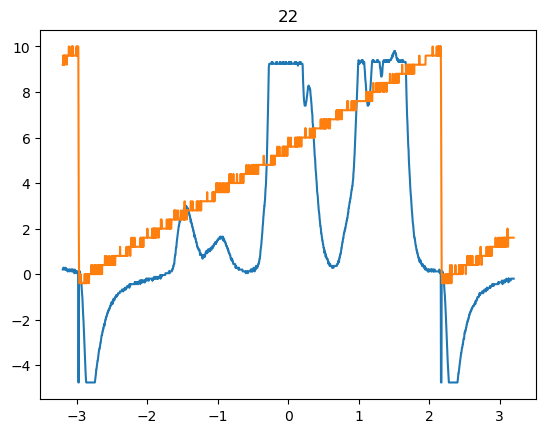

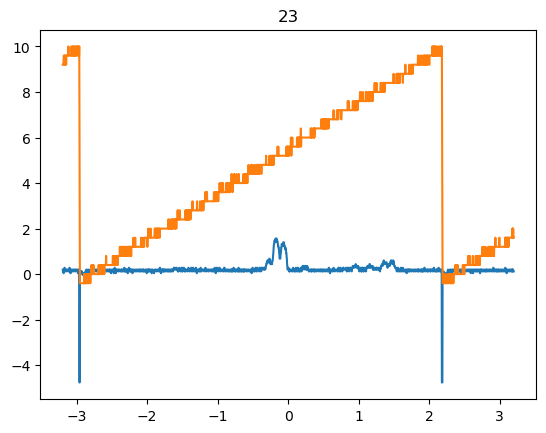

Length mismatch: Expected axis has 2 elements, new values have 3 elements


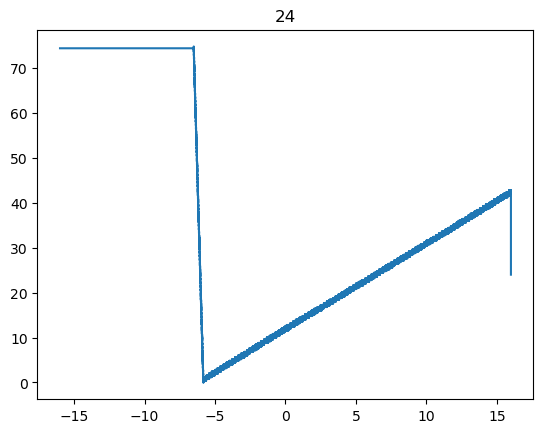

Length mismatch: Expected axis has 2 elements, new values have 3 elements


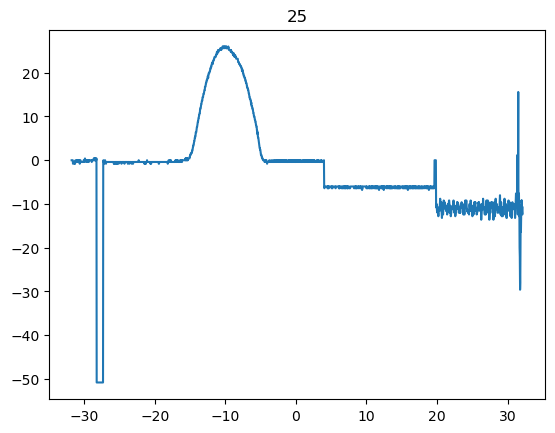

Length mismatch: Expected axis has 2 elements, new values have 3 elements


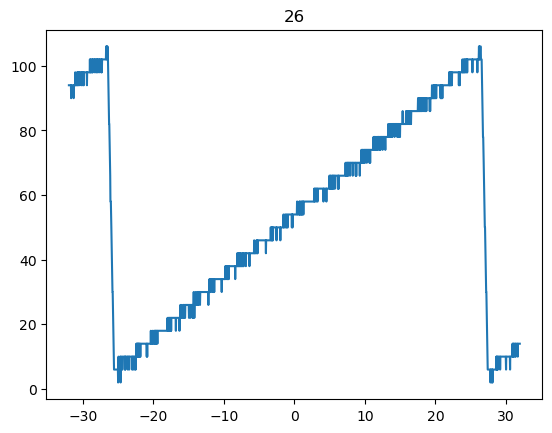

Length mismatch: Expected axis has 2 elements, new values have 3 elements


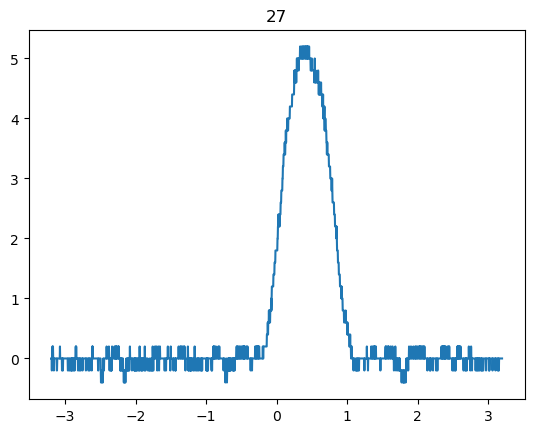

Length mismatch: Expected axis has 2 elements, new values have 3 elements


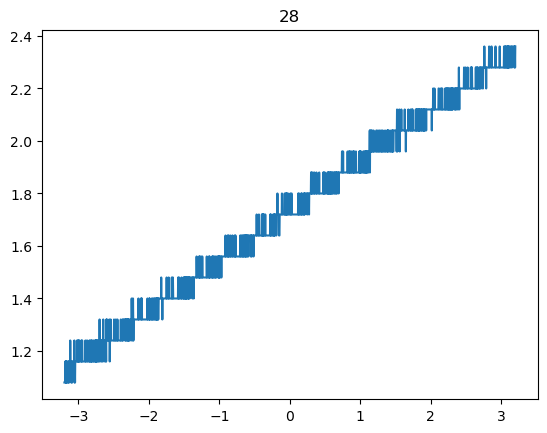

Length mismatch: Expected axis has 2 elements, new values have 3 elements


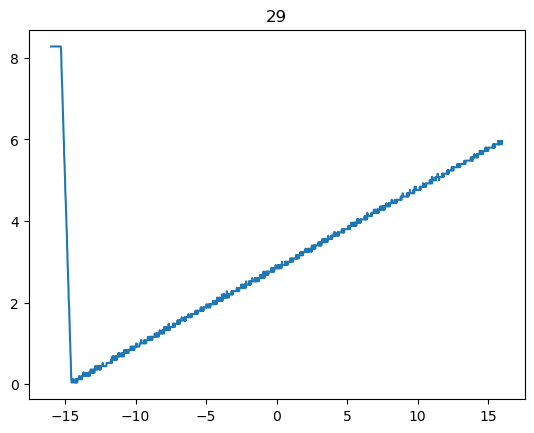

Length mismatch: Expected axis has 2 elements, new values have 3 elements


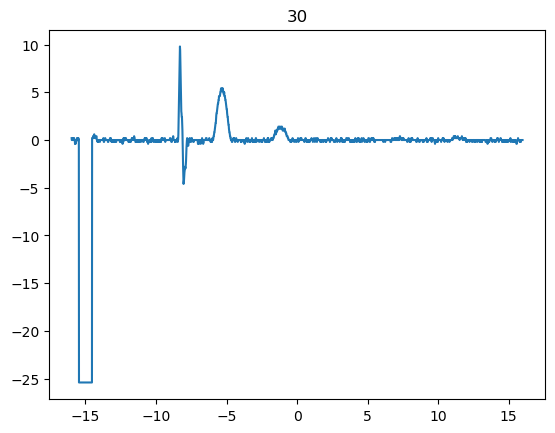

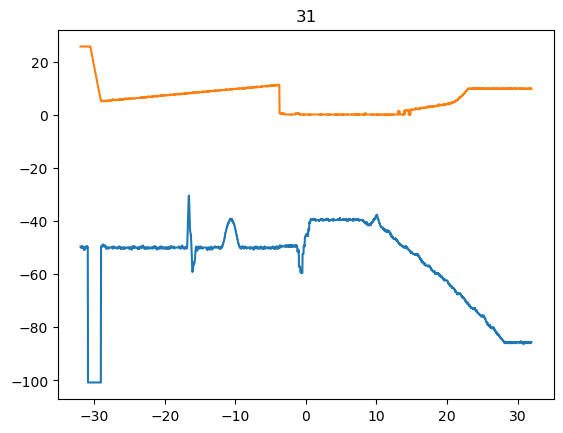

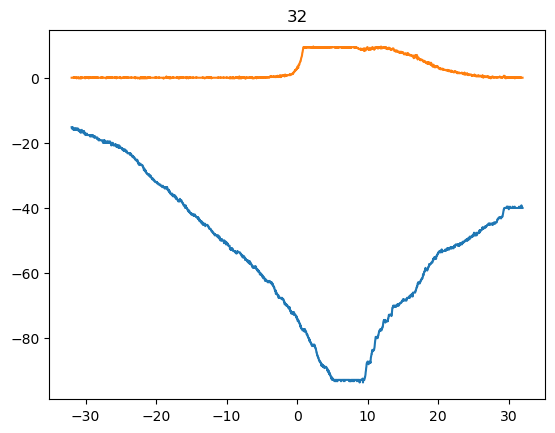

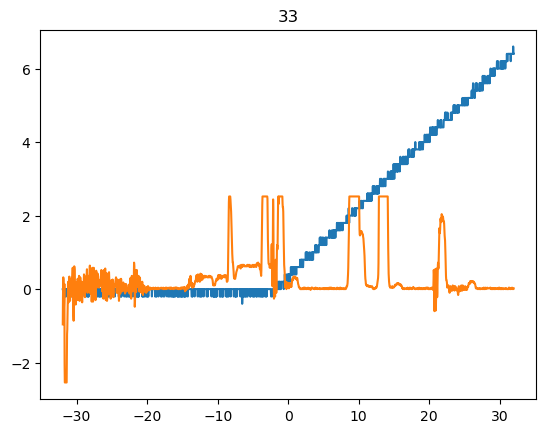

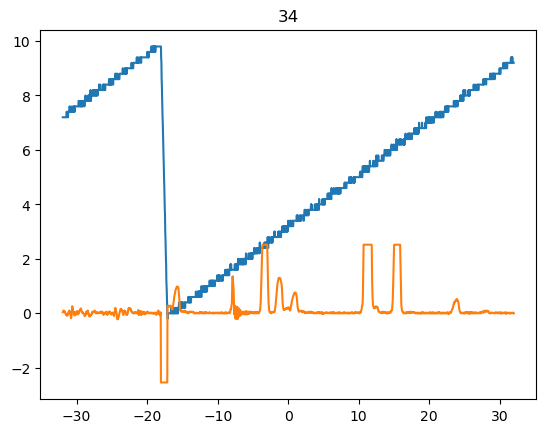

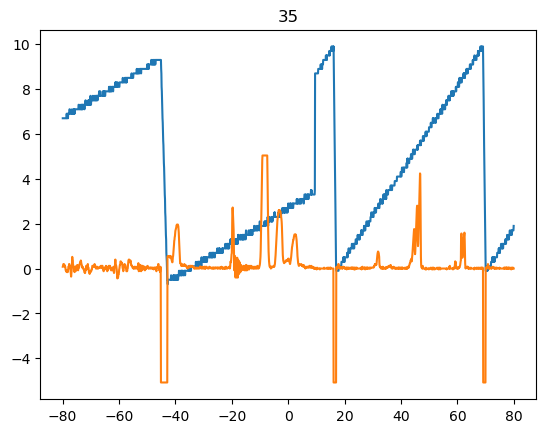

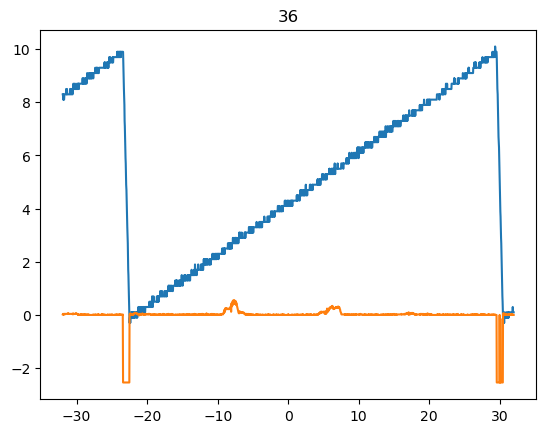

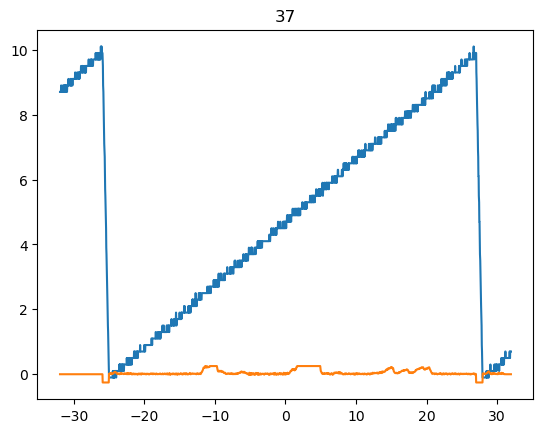

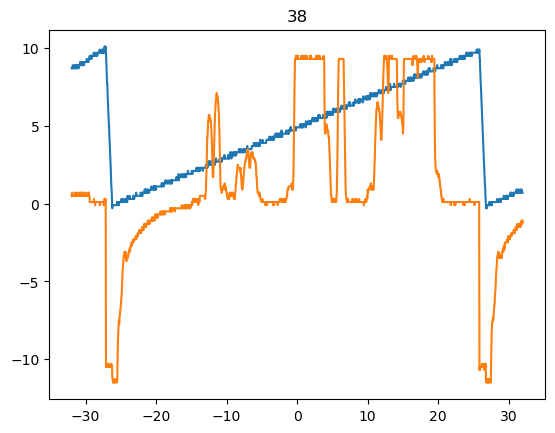

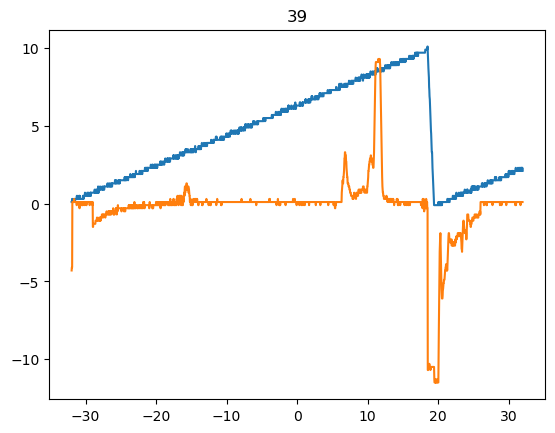

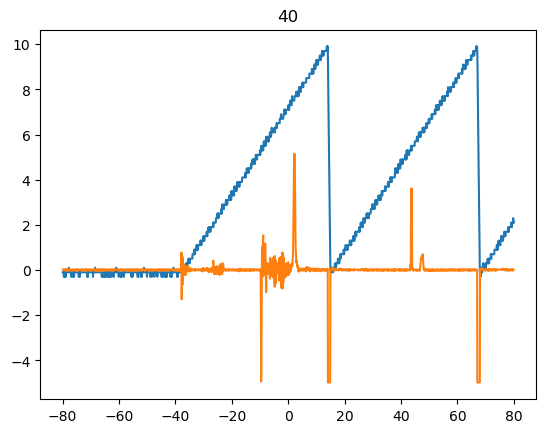

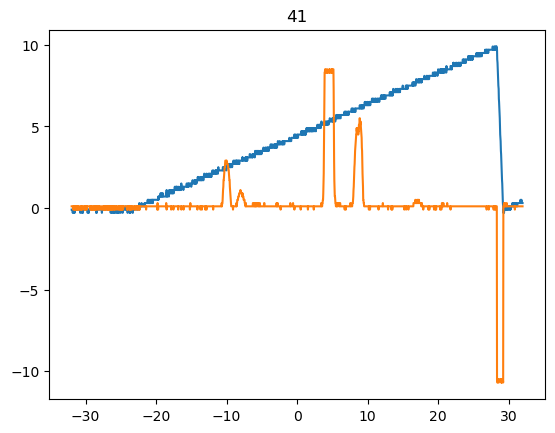

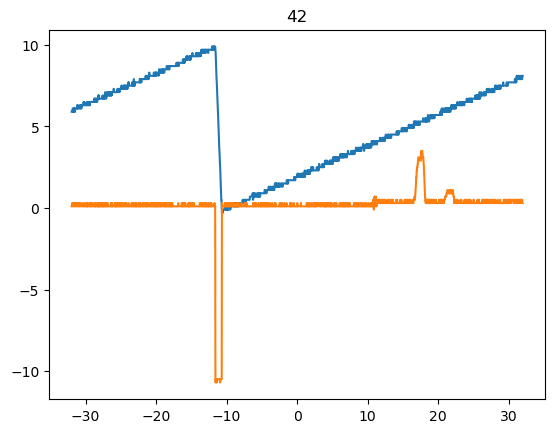

In [3]:
#pressure inside the camber at 9.0*10^-8 mBar
def read_Tek(n, cutoff=[0,1]):
    if n<10:
        file = Path().resolve() / f"TEK0000{n}.CSV"
    else:
        file = Path().resolve() / f"TEK000{n}.CSV"
    try:    
        data=pd.read_csv(file,skiprows=16)
        data=data.set_axis(["time", "Ch1","Ch2"],axis=1)
        length=len(data["time"])
        data = data.iloc[int(length*cutoff[0]):int(length*cutoff[1])]
        return data
    
    except Exception as e:
        print(e)
        try:    
            data=pd.read_csv(file,skiprows=16)
            data=data.set_axis(["time", "Ch2"],axis=1)
            length=len(data["time"])
            data = data.iloc[int(length*cutoff[0]):int(length*cutoff[1])]
            return data
        except Exception as e:
            return pd.DataFrame(0, index=range(2), columns=["time", "Ch1","Ch2"])

for n in range(0,10):


    data1= read_Tek(n)
    plt.title(n)
    plt.plot(data1["time"],data1["Ch1"])
    plt.plot(data1["time"],data1["Ch2"])
    plt.show()
    #plt.plot(data1["Ch1"],data1["Ch2"],".r")
for n in range(10,43):
    data1= read_Tek(n)
    plt.title(n)
    plt.plot(data1["time"],data1["Ch2"])
    try:
        plt.plot(data1["time"],data1["Ch1"])
    except:
        pass
    plt.show()
    #plt.plot(data1["Ch1"],data1["Ch2"],".r")


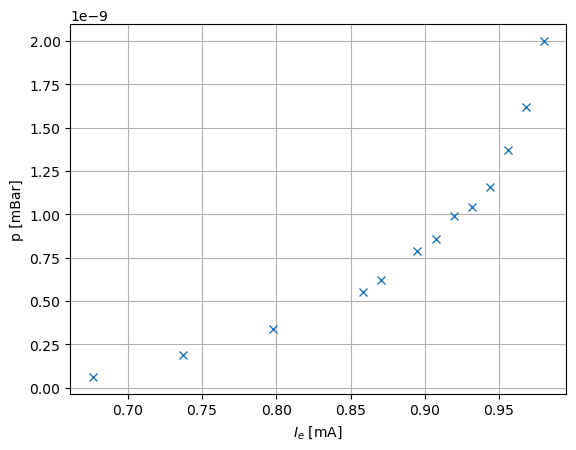

In [4]:
## partial presssure of 

# 3 = 0.13
# 10 = 0.98
def poit_to_i(n):
    dn=7
    di=0.85
    c=-0.2342
    return di/dn*n+c

p_i=np.array([[10.0,2.0e-9], [9.5,0.99e-9], [9.0, 0.55e-9], [8.5, 0.34e-9], [8.0, 0.19e-9], [7.5, 0.06e-9], [9.1, 0.62e-9],  [9.3, 0.79e-9], [9.4, 0.86e-9], [9.6,  1.04e-9], [9.7, 1.16e-9], [9.8, 1.37e-9], [9.9, 1.62e-9]])

plt.plot(poit_to_i(p_i[:,0]), p_i[:,1],"x")
plt.xlabel("$I_e$ [mA]")
plt.ylabel("p [mBar]")
plt.grid(1)
plt.show()


[190, 277]


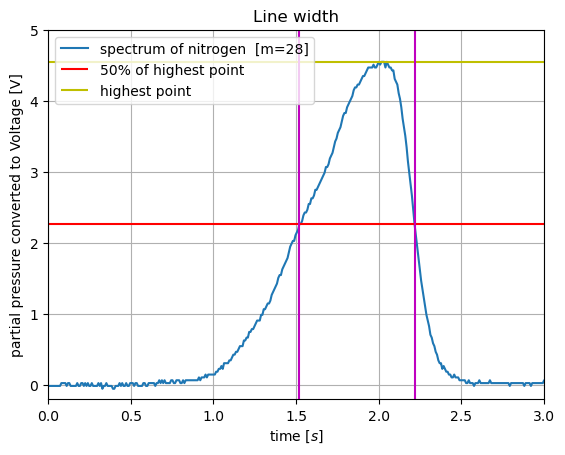

50%-linewidth: 0.6960000000000002 amu


In [5]:
percentage= 50


width_percent = read_Tek(15,[0.5,0.7])
x_offset=min(width_percent["Ch2"])+0.05
plt.plot(width_percent["time"],width_percent["Ch2"]-x_offset,label="spectrum of nitrogen  [m=28]")


percentage_height=max(width_percent["Ch2"]-x_offset)*percentage/100
plt.hlines(percentage_height,0,3.5,"r", label=f"{percentage}% of highest point")
plt.hlines(max(width_percent["Ch2"]-x_offset),0,3.5,"y",label="highest point")

peaks=[np.argmin(np.abs(percentage_height-width_percent["Ch2"]+x_offset)[0:200]),np.argmin(np.abs(percentage_height-width_percent["Ch2"]+x_offset)[200:])+200]
print(peaks)
time = np.array(width_percent["time"])

plt.vlines(time[peaks],-1,5,"m")
plt.xlim(0,3)
plt.ylim(-0.2,5)
plt.title("Line width")
plt.grid(69)
plt.legend()
plt.ylabel("partial pressure converted to Voltage [V]")
plt.xlabel("time [$s$]")
plt.show()

print(f"{percentage}%-linewidth:",time[peaks[1]]-time[peaks[0]], "amu")






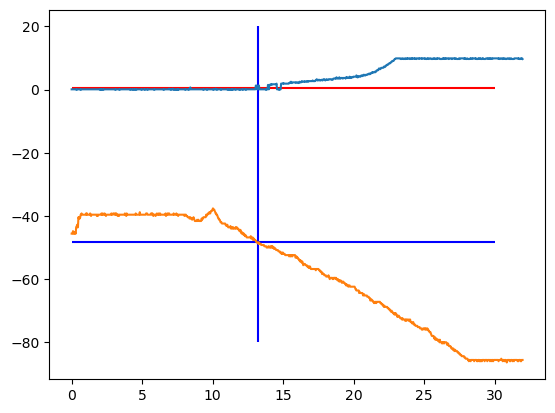

-48.4


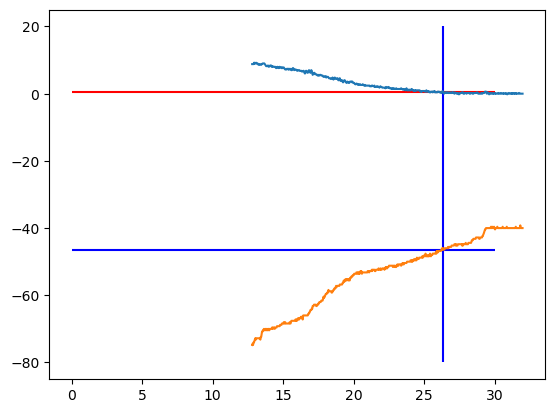

-46.4


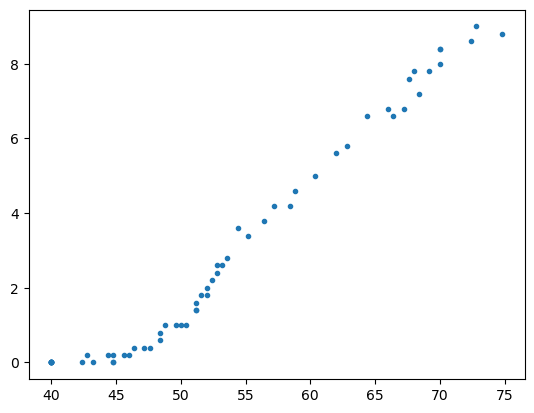

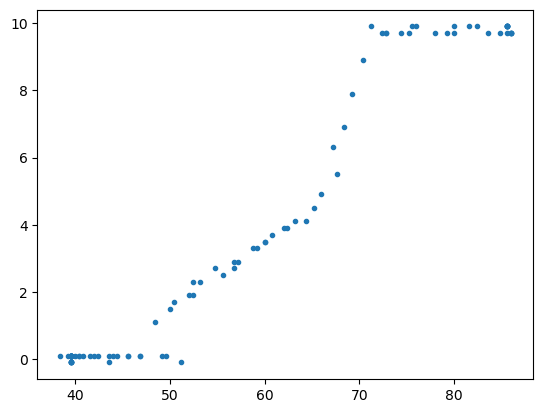

In [6]:
# 14m  disso Tek 31

# 28m  disso Tek 32

## no idea what went wrong  the results don't make sense to me ## 

m14 = read_Tek(31,[0.5,1])

threshold=0.5
g=np.where(m14["Ch1"] > threshold)[0]
v=np.array(m14["Ch2"])
t=np.array(m14["time"])

plt.hlines(threshold,0,30,"r")
plt.hlines(v[g[4]],0,30,"b")
plt.vlines(t[g[4]],-80,20,"b")

plt.plot(m14["time"],m14["Ch1"])
plt.plot(m14["time"],m14["Ch2"])

plt.show()
print(v[g[4]])



m28 = read_Tek(32,[0.7,1])
threshold=0.5
g=np.where(m28["Ch1"] > threshold)[0]
v=np.array(m28["Ch2"])
t=np.array(m28["time"])

plt.hlines(threshold,0,30,"r")
plt.hlines(v[g[-4]],0,30,"b")
plt.vlines(t[g[-4]],-80,20,"b")

plt.plot(m28["time"],m28["Ch1"])
plt.plot(m28["time"],m28["Ch2"])
plt.show()

print(v[g[-4]])

plt.plot(-m28["Ch2"][::10],m28["Ch1"][::10],".")
plt.show()
plt.plot(-m14["Ch2"][::10],m14["Ch1"][::10],".")
plt.show()



In [7]:
# 4.6*10^-5


# Alkan 
# Anregungsenergie 20V 

In [8]:
#Raumptemperatur 24°C

def v_to_t(v,kelvin=False):
# 310K = 2V
# 740K = 26V
    dV=24
    dK=430
    c=274.16
    if kelvin:
        return dK/dV*v+c
    return dK/dV*v+c-273.15

# partial pressure of m=44 and corresponding voltages  
p_t=np.array([[16.98, 0.22e-9], [23.95, 4.19e-8], [22.90, 2.93e-8], [22.60, 2.69e-8], [22.30, 2.35e-8], [21.88, 1.98e-8], [21.47, 1.67e-8], [21.07, 1.42e-8],  [20.87, 1.29e-8], [20.37,  1.02e-8], [20.05, 0.89e-8], [19.76, 0.80e-8],  [19.13, 3.36e-9], [18.74, 2.63e-9], [18.06, 1.57e-9], [17.77, 1.27e-9], [17.52, 1.07e-9], [17.15,  0.80e-9], [16.92, 0.65e-9], [16.61, 0.53e-9], [16.23, 0.40e-9], [16.03,  0.31e-9],  [15.95, 0.28e-9]])


c:\Users\jonah\anaconda3\envs\pua\Lib\site-packages\scipy\_lib\_finite_differences.py:145: RuntimeWarning: invalid value encountered in divide
  return val / prod((dx,) * n, axis=0)


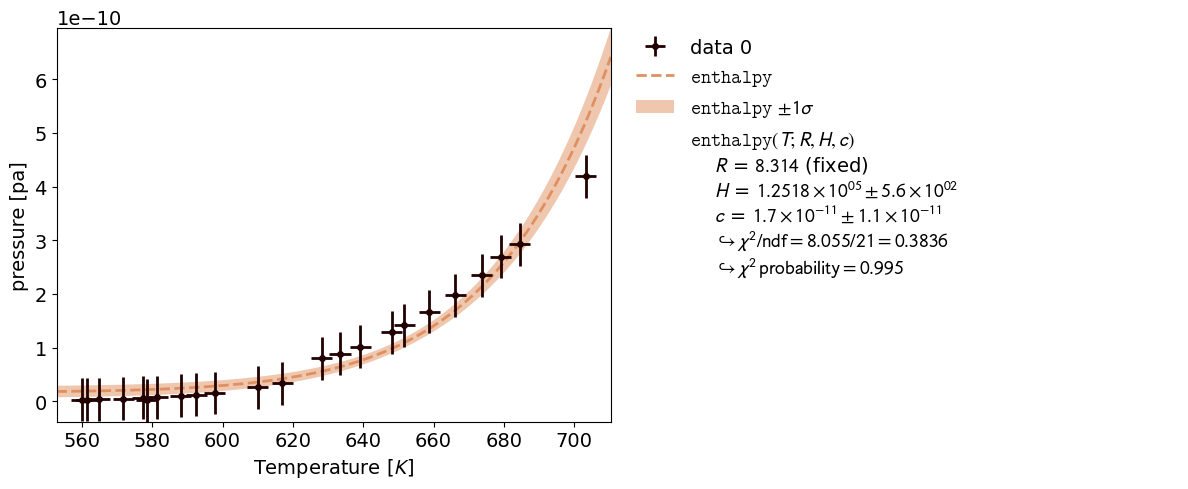

(1.252+/-0.006)e+05 kJ/mol


In [9]:
## calculation of the enthalpy

def enthalpy(T,R,H=10000,c=0): # deffinition of the Function to fit to. T is the  x-Variable all other Variables are changed by Kafe2
    return np.exp(-H/(R*(T)))+c

data = kafe2.XYContainer(v_to_t(p_t[:,0],kelvin=True),p_t[:,1]/100)  # Data container with the measurements

#  errors (well nedd to add error  discussion in the protocol) not final 
data.add_error('y',0.04e-9) 
data.add_error('x',3)

fit = kafe2.Fit(data,enthalpy) # setup the Fit object

fit.fix_parameter("R", 8.314) #  fix R as  it is a constant 

fit.do_fit() 

## plotting  and labeling ##

pl = kafe2.Plot(fit)

pl.y_label = 'pressure [pa]'
pl.x_label = 'Temperature [$K$]'
pl.plot()
plt.show()
enthalpy_value= u.ufloat(fit.parameter_values[1], fit.parameter_errors[1])
print(enthalpy_value,"kJ/mol")
## example for a linear fit the errors are kind of pointless

# def enthalpy2(t_1,R,H,c):
#     return  -H*t_1/R+c
# data = kafe2.XYContainer(1/v_to_t(p_t[:,0],kelvin=True),np.log(p_t[:,1]/100))
# data.add_error('y',0.01e-9)
# data.add_error('x',0.01e-9)

# fit = kafe2.Fit(data,enthalpy2)
# fit.fix_parameter("R", 8.314)

# fit.do_fit()
# pl = kafe2.Plot(fit)
# pl.y_label = '$ln(pressure) $'
# pl.x_label = '$Temperature^{-1}$ [$K^{-1}$]'
# pl.plot()
# plt.show()


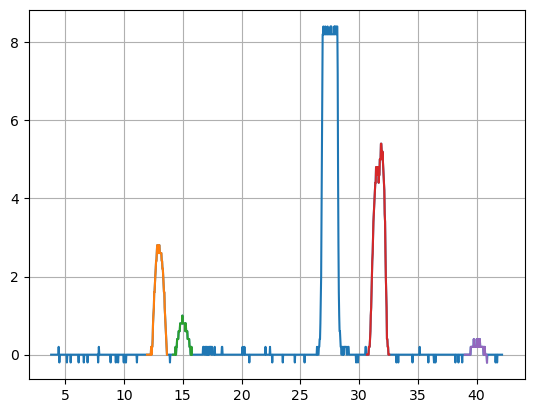

0.03200250312891114
[0.8384437030859078, 0.2848148457047549, 1.8816980817347853, 0.14720767306088453] [1.3249036295369212, 0.43203379224030036]
[0.26598985 0.09035533 0.59695431 0.04670051] 0.9999999999999999


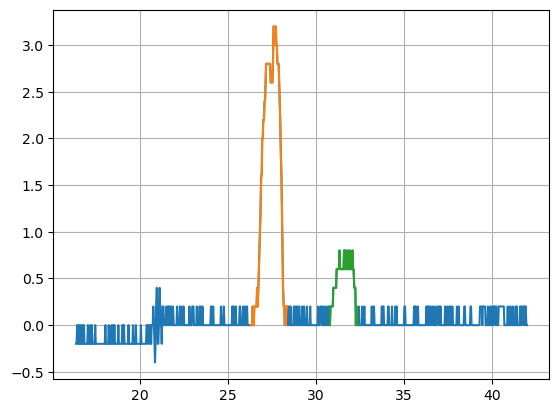

In [16]:
def average_difference(arr):
    arr = np.array(arr)
    differences = [abs(arr[i+1] - arr[i]) for i in range(len(arr) - 1)]
    avg_diff = sum(differences) / len(differences)
    return avg_diff


full_spec = read_Tek(41,[0.2,0.8])

y_offset=0.1
plt.plot(full_spec["time"]+23, full_spec["Ch1"]-y_offset)
plt.grid(2)


pressures = []
dt=average_difference(full_spec["time"])

start_ends = [[255, 309], [324, 375], [840, 900], [1100, 1160]]
for se in start_ends:
    partial_pressure=0

    for el in full_spec["Ch1"].iloc[se[0]:se[1]:3]:
        
        partial_pressure += el*dt
    plt.plot(full_spec["time"].iloc[se[0]:se[1]]+23, full_spec["Ch1"].iloc[se[0]:se[1]]-y_offset)
    pressures.append(partial_pressure)



plt.show()





scaled_spec = read_Tek(42,[0.6,1])

y_offset=0.3

plt.plot(scaled_spec["time"]+10, scaled_spec["Ch1"]-y_offset)

plt.grid(2)

dt=average_difference(scaled_spec["time"])
print(dt)


pressures2=[]
start_ends = [[310,375], [450,500]]
for se in start_ends:
    partial_pressure=0

    for el in scaled_spec["Ch1"].iloc[se[0]:se[1]:3]:
        partial_pressure += el*dt
    plt.plot(scaled_spec["time"].iloc[se[0]:se[1]]+10, scaled_spec["Ch1"].iloc[se[0]:se[1]]-y_offset)
    pressures2.append(partial_pressure)

#pressures.append(pressures[2]*pressures2[0]/pressures2[1])

print(pressures,pressures2)
percentages=np.array(pressures)/sum(pressures)
print(percentages, sum(percentages))


1553    2.240000e-08
1676    5.600000e-09
Name: Ch1, dtype: float64
686     2.600000e-09
748     8.000000e-10
1134    8.200000e-09
1154    8.200000e-09
1276    5.200000e-09
1535    2.000000e-10
Name: Ch1, dtype: float64
[0.64275774 0.2406639  0.07460581 0.03702522 0.00494733]


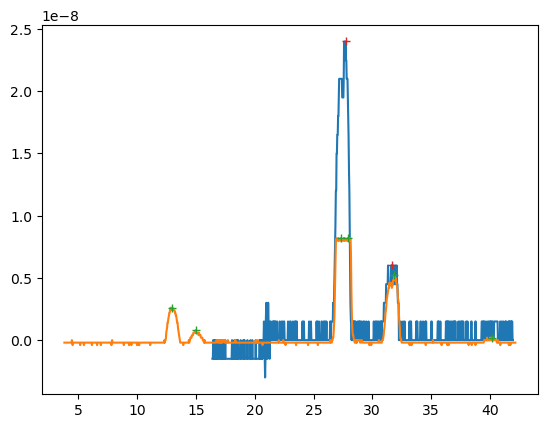

In [ ]:


scaled_spec = read_Tek(42,[0.6,1])
full_spec = read_Tek(41,[0.2,0.8])

plt.plot(scaled_spec["time"]+10, (scaled_spec["Ch1"]-y_offset)*0.75e-8)

plt.plot(full_spec["time"]+23, (full_spec["Ch1"]-y_offset)*1e-9)

fullpeaks=sp.signal.find_peaks((full_spec["Ch1"]-y_offset), distance=20, width=20,height=0.001)[0]
partpeaks=sp.signal.find_peaks((scaled_spec["Ch1"]-y_offset), distance=30, width=20,height=0.001)[0]


plt.plot(full_spec["time"].iloc[fullpeaks]+23, (full_spec["Ch1"].iloc[fullpeaks]-y_offset)*1e-9,"+")
#plt.show()

plt.plot(scaled_spec["time"].iloc[partpeaks]+10, (scaled_spec["Ch1"].iloc[partpeaks]-y_offset)*0.75e-8,"+")


#print((scaled_spec["Ch1"].iloc[partpeaks]-y_offset)*0.7e-8)
#print((full_spec["Ch1"].iloc[fullpeaks]-y_offset)*1e-9)

pres=np.array([2.240000e-08*1, 5.200000e-09/0.62, 2.600000e-09, 8.000000e-10/0.62, 2.000000e-10/1.16])
print(pres/sum(pres))